## Phasors

In optics it is very convenient to represent the field using a complex number and the 
phase of the field using a vector in the complex plane, a *phasor*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ifigures import *
from ifigures.my_plots import *
import time
import matplotlib.colors as colors
import matplotlib.patches as mpatches

In [2]:
dr=[190.0/255.0, 30.0/255.0, 45.0/255.0]
DUy=[254.0/255.0, 213.0/255.0, 58.0/255.0]
dg=[175.0/255.0,169.0/255.0,97.0/255.0] # Durham green
db=[0,174.0/255.0,239.0/255.0]
di=[0.0/255.0,42.0/255.0,65.0/255.0] # Durham ink	
dpi=[203.0/255.0,168.0/255.0,177.0/255.0] #  Durham pink 
ds=[218.0/255.0,205.0/255.0,162.0/255.0] # Durham stone

In [3]:
def base_plot(ax):
    ax.set_xlim(-1.5*xmax,1.5*xmax)
    ax.set_ylim(-1.5*xmax,1.5*xmax)
    ax.set_axis_off() 
#    ax.locator_params(nbins=1)

def my_arrow(ax,x_tail,y_tail,x_head,y_head,color):
    dx = x_head - x_tail
    dy = y_head - y_tail
    arrow = mpatches.FancyArrow(x_tail , y_tail, dx, dy,
                                width=0.02*xmax, head_width = 0.06*xmax, 
                                head_length = 0.3*xmax, length_includes_head=True, 
                                color = color)
    ax.add_patch(arrow)
    
def my_axes(ax,color,flipx,flipy):
    x_tail = flipx*(-1.5*xmax)
    y_tail = 0.0
    x_head = flipx*1.5*xmax
    y_head = 0.0
    dx = x_head - x_tail
    dy = y_head - y_tail
    arrow = mpatches.FancyArrow(x_tail , y_tail, dx, dy,
                                width=0.02*xmax, head_width = 0.06*xmax, 
                                head_length = 0.3*xmax, length_includes_head=True, 
                                color = color)

    ax.add_patch(arrow)
    y_tail = flipy*(-1.5*xmax)
    x_tail = 0.0
    y_head = flipy*(1.5*xmax)
    x_head = 0.0
    dx = x_head - x_tail
    dy = y_head - y_tail
    arrow = mpatches.FancyArrow(x_tail , y_tail, dx, dy,
                                width=0.02*xmax, head_width = 0.06*xmax, 
                                head_length = 0.3*xmax, length_includes_head=True, 
                                color = color)
    ax.add_patch(arrow)
    if flipy > 0:
        ax.text(0.1*xmax,1.3*xmax,r'${\cal E}/{\cal E}_0$',fontsize = 24, color=color)
        ax.text(1.3*xmax,0.1*xmax,r'$z$',fontsize = 24, color=color)
    if flipy < 0:
        ax.text(0.1*xmax,-1.5*xmax,r'$z$',fontsize = 24, color=color)
        ax.text(1.3*xmax,0.1*xmax,r'${\cal E}/{\cal E}_0$',fontsize = 24, color=color)

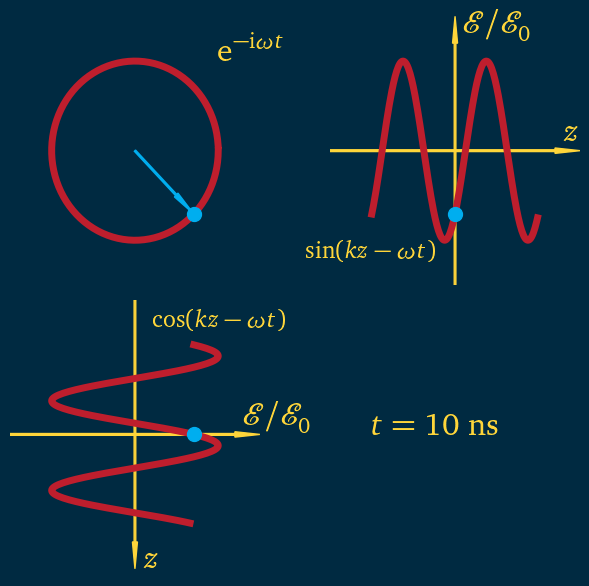

In [4]:
phi = 1 * np.pi/4
xmax = 1
t = 10
x = np.arange(-xmax,xmax,0.01)
y = np.sin(2*np.pi*x-phi)
theta = np.arange(0,2*np.pi,2*np.pi/99)

fig, axs = plt.subplots(2,2,figsize=(6, 6),
                       facecolor=[0.0/255.0,42.0/255.0,65.0/255.0])
for ax in axs.flat:
    base_plot(ax)
                       
axs[0,0].plot(np.cos(theta),-np.sin(theta), color = dr, alpha = 1.0,zorder=1, linewidth = 5)
axs[0,0].scatter(np.cos(phi),-np.sin(phi), color = db, alpha = 1.0, zorder=2, s = 100)

my_arrow(axs[0,0],0,0,np.cos(phi),-np.cos(phi),db)
my_axes(axs[0,1],DUy,1,1)
my_axes(axs[1,0],DUy,1,-1)

axs[0,1].plot(x,np.sin(2*np.pi*x-phi), color = dr, alpha = 1.0,zorder=1, linewidth = 5)
axs[0,1].scatter(0,np.sin(-phi), color = db, alpha = 1.0, zorder=2, s = 100)
axs[1,0].plot(xmax*np.cos(2*np.pi*x-phi),-x, color = dr, alpha = 1.0,zorder=1, linewidth = 5)
axs[1,0].scatter(xmax*np.cos(-phi),0, color = db, alpha = 1.0, zorder=2, s = 100)

axs[0,0].text(xmax,xmax,r'${\rm e}^{-{\rm i}\omega t}$',fontsize = 24, color=DUy)
axs[0,1].text(-1.8*xmax,-1.2*xmax,r'${\rm sin}(kz-\omega t)$',fontsize = 18, color= DUy)
axs[1,0].text(0.2*xmax,1.2*xmax,r'${\rm cos}(kz-\omega t)$',fontsize = 18, color= DUy)
axs[1,1].text(-1.0*xmax,0.0,r'$t= %.0f ~{\rm ns}$' %t,fontsize = 24, color=DUy)

plt.tight_layout()                     

In [5]:
from ifigures import *
from ifigures.my_plots import *
from io import BytesIO

def PhasorPlot(Time):
    phi = Time * np.pi/36
    t = 2*Time/72

    fig, axs = plt.subplots(2,2,figsize=(8, 8),
                       facecolor=[0.0/255.0,42.0/255.0,65.0/255.0])
    for ax in axs.flat:
        base_plot(ax)
    axs[0,0].plot(np.cos(theta),-np.sin(theta), color = dr, alpha = 1.0,zorder=1, linewidth = 5)
    axs[0,0].scatter(1,0, color = dr, alpha = 1.0, zorder=2, s = 100)
    axs[0,0].scatter(np.cos(phi),-np.sin(phi), color = db, alpha = 1.0, zorder=2, s = 100)

    my_arrow(axs[0,0],0,0,np.cos(phi),-np.sin(phi),db)
    my_axes(axs[0,1],DUy,1,1)
    my_axes(axs[1,0],DUy,1,-1)

    axs[0,1].plot(x,np.sin(2*np.pi*x-phi), color = dr, alpha = 1.0,zorder=1, linewidth = 5)
    axs[0,1].scatter(0,np.sin(-phi), color = db, alpha = 1.0, zorder=2, s = 100)
    axs[1,0].plot(xmax*np.cos(2*np.pi*x-phi),-x, color = dr, alpha = 1.0,zorder=1, linewidth = 5)
    axs[1,0].scatter(xmax*np.cos(-phi),0, color = db, alpha = 1.0, zorder=2, s = 100)

    axs[0,0].text(xmax,xmax,r'${\rm e}^{-{\rm i}\omega t}$',fontsize = 24, color=DUy)
    axs[0,1].text(-1.8*xmax,-1.2*xmax,r'${\rm sin}(kz-\omega t)$',fontsize = 18, color= DUy)
    axs[1,0].text(0.2*xmax,1.2*xmax,r'${\rm cos}(kz-\omega t)$',fontsize = 18, color= DUy)
    axs[1,1].text(-1.0*xmax,0.0,r'${\rm Time} = %.2f ~{\rm fs}$' %t,fontsize = 24, color=DUy)

    plt.tight_layout()
    return fig, " "


figure_example1 = InteractiveFigure(PhasorPlot,
#               left_right_phase=RangeWidget(0.5, 1.0, 0.25),
               Time = RangeWidgetViridis(0,72,1)
               )

figure_example1.saveStandaloneHTML("phasor.html")
figure_example1.show()